Імпорти та необхідні бібліотеки

In [2]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt


2. Парсинг веб-сторінки
Функція для витягування тексту з веб-сторінки:

In [3]:


def parse_web_page(url):
    """
    Fetch the content of the given web page.
    
    Args:
        url (str): The URL of the web page to fetch.
        
    Returns:
        str: The content of the page as a string.
        
    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup.get_text(separator=' ', strip=True)
    else:
        raise requests.HTTPError(f"Error: {response.status_code}")

# Виклик функції


try:
    print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])
except requests.HTTPError as e:
    print(e)


Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Search Searc


3. Отримання даних з API та запис у файл JSON

In [6]:
def parse_api(api_url):
    """
    Fetch the data of the given API endpoint and save it to result.json.
    
    Args:
        api_url (str): The URL of the API endpoint.
    
    Returns:
        None.
    
    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        with open('result.json', 'w') as file:
            json.dump(data, file, indent=4)
        print("Data successfully written to result.json")
    else:
        raise requests.HTTPError(f"Error: {response.status_code}")

# Виклик функції
try:
    parse_api('https://api.github.com/')
except requests.HTTPError as e:
    print(e)


Data successfully written to result.json


4. Парсинг JSON файлу з погодою

In [15]:

import json

def parse_json(date):
    """
    Parse the data from weather.json file and return weather data for a given date.
    
    Args:
        date (str): The date for which we look up the weather.
    
    Returns:
        dict: A dictionary with weather data for the given date or a message if the date is not found.
    """
    try:
        with open('weather.json', 'r') as file:
            data = json.load(file)
        
        # Доступ до масиву 'daily' та фільтрація за датою
        weather_data = next((entry for entry in data['daily'] if entry['date'] == date), None)
        
        if weather_data:
            return weather_data
        else:
            return f"No weather data found for date: {date}"
    except FileNotFoundError:
        return "File 'weather.json' not found."
    except json.JSONDecodeError:
        return "Error decoding the JSON file."

# Приклад виклику функції
target_date = '2024-08-19'
print(parse_json(target_date))


{'date': '2024-08-19', 'max_temperature': 30.0, 'min_temperature': 21.0, 'precipitation': 5.0, 'wind_speed': 10.0, 'humidity': 70, 'weather_description': 'Light rain'}


5. Парсинг CSV файлу з погодою

In [13]:
import csv

def parse_csv(date):
    """
    Parse the data from weather.csv file and return weather data for a given date.
    
    Args:
        date (str): The date for which we look up the weather.
    
    Returns:
        list: a list of weather data for a given date.
    """
    with open('weather.csv', 'r') as file:
        reader = csv.DictReader(file)
        weather_data = [row for row in reader if row['CET'] == date]  # Use 'CET' instead of 'date'
    
    return weather_data

# Call the function
target_date = '1997-3-29'
print(parse_csv(target_date))


[{'CET': '1997-3-29', 'Max TemperatureC': '22', 'Mean TemperatureC': '14', 'Min TemperatureC': '8', 'Dew PointC': '9', 'MeanDew PointC': '6', 'Min DewpointC': '1', 'Max Humidity': '76', ' Mean Humidity': '54', ' Min Humidity': '43', ' Max Sea Level PressurehPa': '1018', ' Mean Sea Level PressurehPa': '1017', ' Min Sea Level PressurehPa': '1015', ' Max VisibilityKm': '10', ' Mean VisibilityKm': '10', ' Min VisibilitykM': '10', ' Max Wind SpeedKm/h': '21', ' Mean Wind SpeedKm/h': '6', ' Max Gust SpeedKm/h': '', 'Precipitationmm': '0.00', ' CloudCover': '1', ' Events': '', 'WindDirDegrees': '43'}]


6. Візуалізація даних

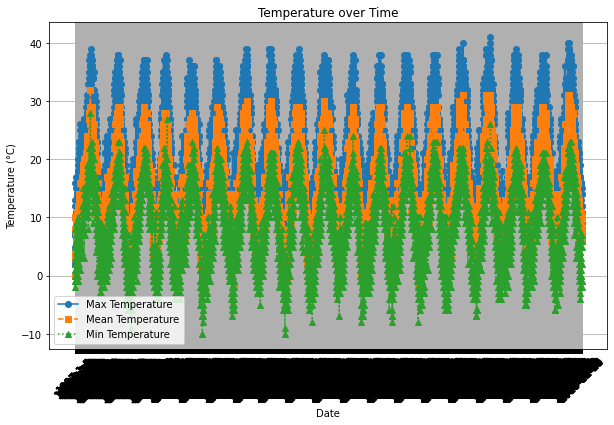

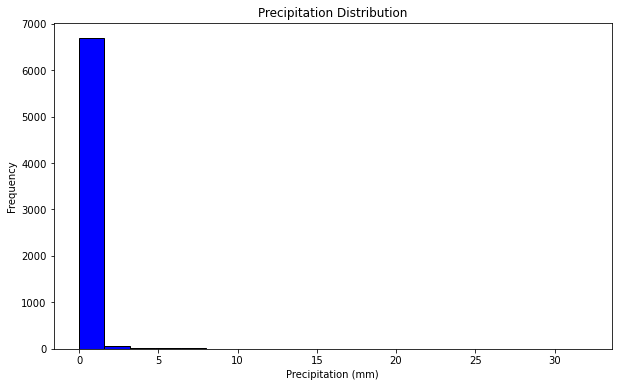

In [12]:


def visualize_data():
   
    # Load data from CSV
    data = pd.read_csv('weather.csv')
    
    # Plot temperature over dates 
    plt.figure(figsize=(10, 6))
    plt.plot(data['CET'], data['Max TemperatureC'], marker='o', label='Max Temperature')
    plt.plot(data['CET'], data['Mean TemperatureC'], marker='s', label='Mean Temperature', linestyle='--')
    plt.plot(data['CET'], data['Min TemperatureC'], marker='^', label='Min Temperature', linestyle=':')
    plt.title('Temperature over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig('temperature_over_time.png')
    plt.show()

    # Histogram for precipitation
    plt.figure(figsize=(10, 6))
    plt.hist(data['Precipitationmm'], bins=20, color='blue', edgecolor='black')
    plt.title('Precipitation Distribution')
    plt.xlabel('Precipitation (mm)')
    plt.ylabel('Frequency')
    plt.savefig('precipitation_distribution.png')
    plt.show()

# Call the function
visualize_data()

